# Radial Basis Function

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df=sns.load_dataset('iris')

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
col=['petal_length','petal_width']
col

['petal_length', 'petal_width']

In [7]:
x=df.loc[:,col]
species_to_num={
    'setosa':0,
    'versicolor':1
    ,'virginica':2
}
df['target']=df['species'].map(species_to_num)
y=df['target']

In [8]:
x

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
x_train

,petal_length,petal_width
137,5.5,1.8
84,4.5,1.5
27,1.5,0.2
127,4.9,1.8
132,5.6,2.2
...,...,...
9,1.5,0.1
103,5.6,1.8
67,4.1,1.0
117,6.7,2.2


In [12]:
y_train

137    2
84     1
27     0
127    2
132    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: target, Length: 120, dtype: int64

In [13]:
x_test

,petal_length,petal_width
114,5.1,2.4
62,4.0,1.0
33,1.4,0.2
107,6.3,1.8
7,1.5,0.2
100,6.0,2.5
40,1.3,0.3
86,4.7,1.5
76,4.8,1.4
71,4.0,1.3


## Scale Features

In [14]:
sc_x=StandardScaler()
x_std_train=sc_x.fit_transform(x_train)

In [15]:
model=svm.SVC(kernel='rbf',gamma=0.7,C=1)
model.fit(x_std_train,y_train)

SVC(C=1, gamma=0.7)

## Cross Validation Within Train DataSet

In [20]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score

In [21]:
result=cross_val_score(model,x_std_train,y_train,cv=10,scoring='accuracy')

print('Average Accuracy:\t {0:.4f}'.format(np.mean(result)))
print('Accuracy SD:\t\t {0:.4f}'.format(np.std(result)))

Average Accuracy:	 0.9500
Accuracy SD:		 0.0553


In [22]:
y_train_preds=cross_val_predict(model,x_std_train,y_train,cv=3)
confusion_matrix(y_train,y_train_preds)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [25]:
print('Precision score:\t{0:.4f}'.format(precision_score(y_train,y_train_preds,average='weighted')))
print('Precision score:\t{0:.4f}'.format(recall_score(y_train,y_train_preds,average='weighted')))
print('Precision score:\t{0:.4f}'.format(f1_score(y_train,y_train_preds,average='weighted')))

Precision score:	0.9586
Precision score:	0.9583
Precision score:	0.9584


## Grid Search

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [27]:
pipeline=Pipeline([('model',svm.SVC(kernel='rbf',C=1,gamma=0.1))])

In [28]:
params={'model__C':(0.1,.5,1,2,5,10,20),
       'model__gamma':(0.001,0.01,0.1,0.25,0.5,0.75,1)}

In [29]:
svm_grid_rbf=GridSearchCV(pipeline,params,n_jobs=1,cv=3,verbose=1,scoring='accuracy')

In [30]:
svm_grid_rbf.fit(x_train,y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', SVC(C=1, gamma=0.1))]),
             n_jobs=1,
             param_grid={'model__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'model__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
                                          1)},
             scoring='accuracy', verbose=1)

In [31]:
svm_grid_rbf.best_score_

0.9583333333333334

In [32]:
best=svm_grid_rbf.best_estimator_.get_params()

In [33]:
best

{'memory': None,
 'steps': [('model', SVC(C=0.5, gamma=0.5))],
 'verbose': False,
 'model': SVC(C=0.5, gamma=0.5),
 'model__C': 0.5,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 0.5,
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [34]:
for k in sorted(params.keys()):
    print('\t {0}: \t {1:.2f}'.format(k,best[k]))

	 model__C: 	 0.50
	 model__gamma: 	 0.50


In [36]:
y_test_pred=svm_grid_rbf.predict(x_test)
y_test

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
Name: target, dtype: int64

In [37]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [39]:
print('Precision score:\t{0:.4f}'.format(precision_score(y_test,y_test_pred,average='weighted')))
print('Precision score:\t{0:.4f}'.format(recall_score(y_test,y_test_pred,average='weighted')))
print('Precision score:\t{0:.4f}'.format(f1_score(y_test,y_test_pred,average='weighted')))

Precision score:	1.0000
Precision score:	1.0000
Precision score:	1.0000


In [43]:
xv=x.values.reshape(-1,1)
h=0.02
x_min,x_max=xv.min(),xv.max()+1
y_min,y_max=y.min(),y.max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

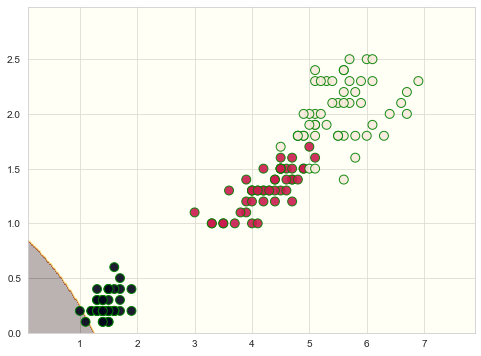

In [44]:
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
fig=plt.figure(figsize=(8,6))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3);
plt.scatter(x.values[:,0],x.values[:,1],c=y,s=80,alpha=0.9,edgecolors='g');